<img src="http://www.cs.wm.edu/~rml/images/wm_horizontal_single_line_full_color.png">

<h1 style="text-align:center;">
Hexbin Tutorial
</h1>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

This data is from the fivethirtyeight story hosted at https://projects.fivethirtyeight.com/2020-endorsements/democratic-primary/:

In [3]:
endorse = pd.read_csv('Data/Endorsements Data F24.csv')

If we have a lot of data, like we do here, one alternative to a standard scatterplot is to make a plot with hexagonal binning. Let's make the plot and then talk about how to interpret it:

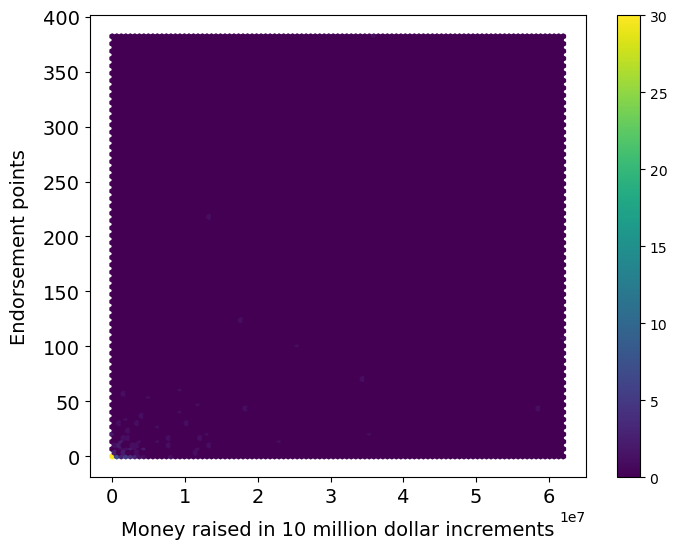

In [4]:
plt.figure(figsize = [8,6])
ax = plt.hexbin(endorse['money_raised'], endorse['endorsement_points'] )

plt.xlabel('Money raised in 10 million dollar increments', fontsize = 14, labelpad = 10)
plt.ylabel('Endorsement points', fontsize = 14, labelpad = 10)
plt.tick_params(labelsize = 14)

cb = plt.colorbar(ax)

Wow, that just looks like a big purple postage stamp. In order to see anything meaningful, we need to add a few parameters:

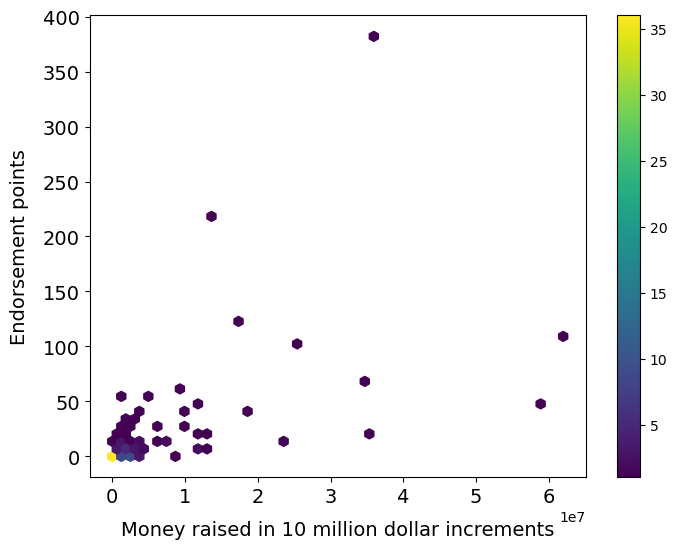

In [6]:
plt.figure(figsize = [8,6])
ax = plt.hexbin(endorse['money_raised'], endorse['endorsement_points'],
                mincnt = 1, gridsize=50)

plt.xlabel('Money raised in 10 million dollar increments', fontsize = 14, labelpad = 10)
plt.ylabel('Endorsement points', fontsize = 14, labelpad = 10)
plt.tick_params(labelsize = 14)

cb = plt.colorbar(ax)

That's a bit better. What are the hexagons? 

Each hexagon covers a defined area on the original plot grid. The hexagon is shaded in according to how many of the original points were located in that area. The color bar on the right shows the scale. See the yellow hexagon down in the bottom corner? Approximately 35 of the original points were located there - we couldn't count them when they were all plotted on top of each other in the scatterplot. The hexagonal binning plot just shows a single hexagon but uses the color to indicate the density. The purple hexagons all indicate a single point. 

What do the parameters mean?  

`mincnt` is the minimum count in an area for which a hexagon will be drawn. That means if we see a hexagon at all, there was at least one point in the area it covers. The default is 0 - that's why we saw the purple postage stamp - it drew hexagons everywhere!

`gridsize` is how many hexagons should fit width-wise into the space of the plot. The default value is 100 - that is why the hexagons were so small when we started. We changed this to 50 - that makes every hexagon twice as large. Let's see what happens when we change it to 10: 

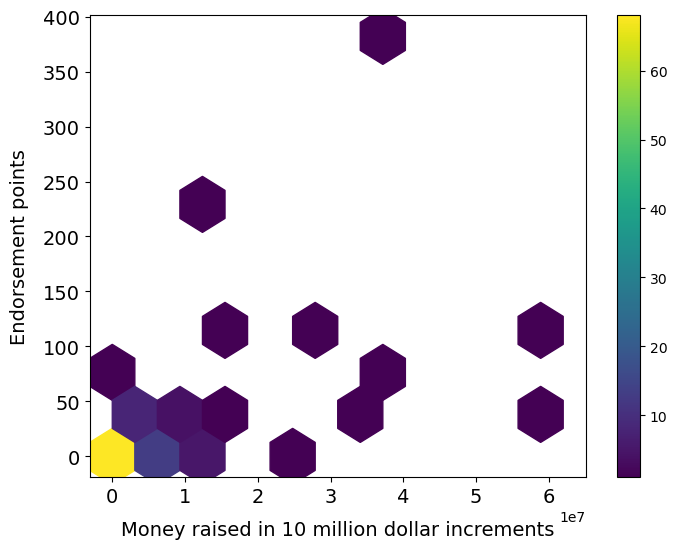

In [7]:
plt.figure(figsize = [8,6])
ax = plt.hexbin(endorse['money_raised'], endorse['endorsement_points'],
                mincnt = 1, gridsize=10)

plt.xlabel('Money raised in 10 million dollar increments', fontsize = 14, labelpad = 10)
plt.ylabel('Endorsement points', fontsize = 14, labelpad = 10)
plt.tick_params(labelsize = 14)

cb = plt.colorbar(ax)

We have fewer hexagons, but they are much larger. Notice also that the scale on the color bar changed - now the yellow hexagon has > 60 observations in it because it covers a larger area. A larger number is probably a better choice for this plot - let's use 25 next.

What about the color bar? That is created with this line of code:
`plt.colorbar(ax)`

It is worth trying different color schemes to see if we can better visualize the data. Some of the colors in the default color map are a bit hard to distinguish. We can certainly try others:

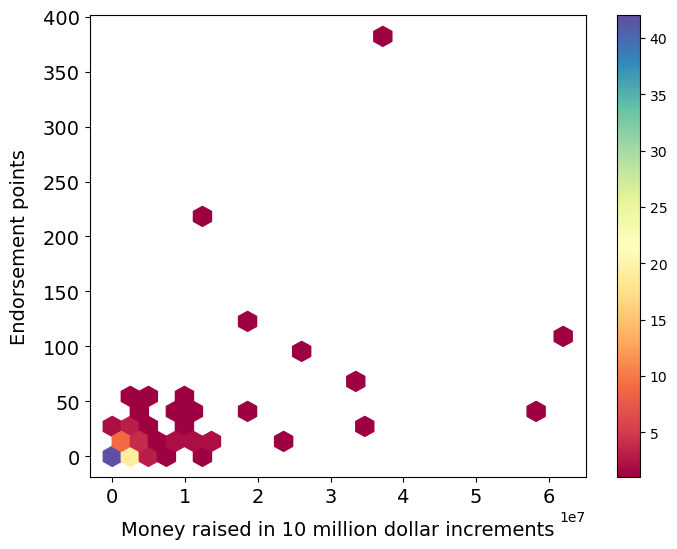

In [8]:
plt.figure(figsize = [8,6])
ax = plt.hexbin(endorse['money_raised'], endorse['endorsement_points'],
                mincnt = 1, gridsize=25, cmap = 'Spectral')

plt.xlabel('Money raised in 10 million dollar increments', fontsize = 14, labelpad = 10)
plt.ylabel('Endorsement points', fontsize = 14, labelpad = 10)
plt.tick_params(labelsize = 14)

cb = plt.colorbar(ax)

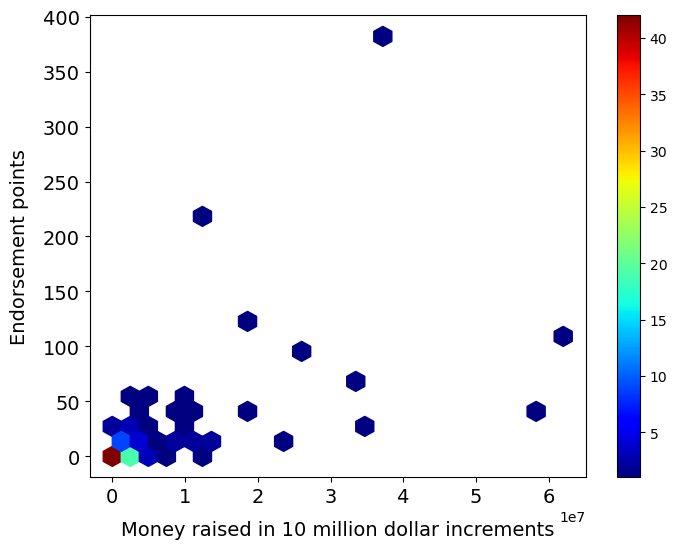

In [9]:
plt.figure(figsize = [8,6])
ax = plt.hexbin(endorse['money_raised'], endorse['endorsement_points'],
                mincnt = 1, gridsize=25, cmap = 'jet')

plt.xlabel('Money raised in 10 million dollar increments', fontsize = 14, labelpad = 10)
plt.ylabel('Endorsement points', fontsize = 14, labelpad = 10)
plt.tick_params(labelsize = 14)

cb = plt.colorbar(ax)

You can find a full list of available color maps here: https://matplotlib.org/stable/tutorials/colors/colormaps.html  